In [54]:
import pandas as pd
import numpy as np
import matplotlib as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm

In [2]:
df = pd.read_csv('usa_data.csv')

In [25]:
df.head(13)

,location_country,ua_browser,ua_form_factor,total_visitors,total_sessions,total_checkouts,total_orders_placed
0,United States,Instagram,Mobile,58,62,14,12
1,United States,Instagram,Mobile,22,23,5,5
2,United States,Instagram,Mobile,62,64,13,5
3,United States,Instagram,Mobile,65,66,7,5
4,United States,Instagram,Mobile,133,139,12,5
5,United States,Instagram,Mobile,23,24,5,4
6,United States,Instagram,Mobile,25,25,4,4
7,United States,Instagram,Mobile,9,9,3,3
8,United States,Instagram,Mobile,11,11,3,3
9,United States,Instagram,Mobile,19,20,3,3


<AxesSubplot:>

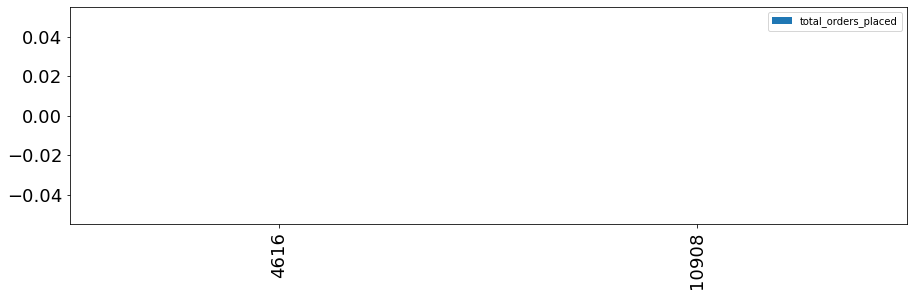

In [136]:
## I want to see a bar chart visualizing the number of orders placed for each Ua_browser
# I want to group all the instagram orders placed into a single data point for example (instagram has this mmany orders placed)
df[['ua_browser','total_orders_placed']][:].plot.bar(figsize=(15,4), fontsize=18)

In [11]:
#How to add a color to chart and make x and y labels show for ua_broswer and total orders placed 
#for the color section i want to add a differnt color for each ua_broswer type

usa_df = pd.read_csv('usa_data.csv',
                                usecols=['ua_browser', 'total_orders_placed'],
                                index_col='ua_browser')

<AxesSubplot:xlabel='ua_browser'>

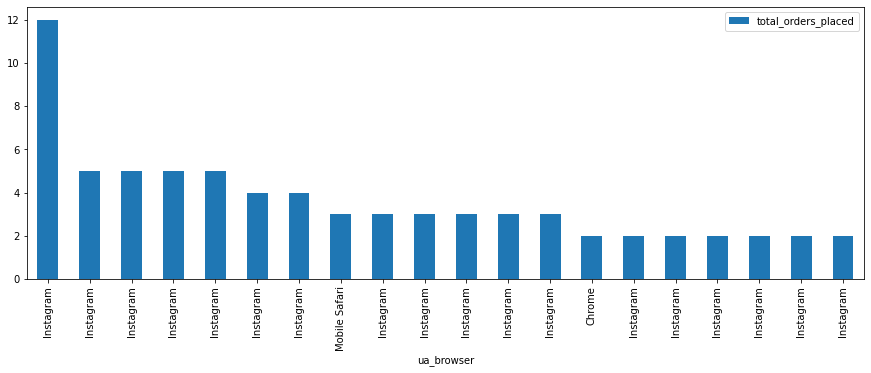

In [26]:
usa_df[:20].sort_values(by='total_orders_placed', ascending=False).plot.bar(figsize=(15,5))

In [31]:
gb = df.groupby("ua_browser")


In [135]:
gb.head()

,location_country,ua_browser,ua_form_factor,total_visitors,total_sessions,total_checkouts,total_orders_placed
0,United States,Instagram,Mobile,58,62,14,12
1,United States,Instagram,Mobile,22,23,5,5
2,United States,Instagram,Mobile,62,64,13,5
3,United States,Instagram,Mobile,65,66,7,5
4,United States,Instagram,Mobile,133,139,12,5
...,...,...,...,...,...,...,...
8690,United States,Opera,Desktop,1,1,0,0
9316,United States,Firefox Mobile,Mobile,1,1,0,0
10566,United States,Firefox iOS,Mobile,1,2,0,0
10905,United States,Puffin,Mobile,1,1,0,0


In [34]:
usa_order = pd.DataFrame()

for name, group in df.groupby("ua_browser"):
    if usa_order.empty:
        usa_order = group.set_index("location_country")[["total_orders_placed"]]

In [35]:
usa_order.head()

,total_orders_placed
location_country,
United States,2
United States,1
United States,1
United States,1
United States,1


In [38]:
ua = df.groupby('ua_browser')
ua

In [70]:
for ua_browser, df in ua:
    print(ua_browser)
    print(df)
    
plot.()

SyntaxError: invalid syntax (<ipython-input-70-f4b575743a23>, line 5)

In [77]:
# i want to seprate each au_broswer into single data frames and want to see how many total_orders_placed are for each au_broswer
ua.get_group('Instagram').sum()


location_country       United StatesUnited StatesUnited StatesUnited ...
ua_browser             InstagramInstagramInstagramInstagramInstagramI...
ua_form_factor         MobileMobileMobileMobileMobileMobileMobileMobi...
total_visitors                                                     18307
total_sessions                                                     19406
total_checkouts                                                      759
total_orders_placed                                                  482
dtype: object

In [125]:
ua.get_group('Chrome').sum()





location_country       United StatesUnited StatesUnited StatesUnited ...
ua_form_factor         DesktopDesktopDesktopDesktopDesktopDesktopDesk...
total_visitors                                                       759
total_sessions                                                       844
total_checkouts                                                       33
total_orders_placed                                                   23
dtype: object

In [120]:
ua.max()





,location_country,ua_form_factor,total_visitors,total_sessions,total_checkouts,total_orders_placed
ua_browser,,,,,,
Chrome,United States,Tablet,38,41,2,2
Chrome Mobile,United States,Mobile,136,136,1,1
Chrome Mobile iOS,United States,Tablet,4,18,1,1
Edge,United States,Desktop,1,1,0,0
Facebook,United States,Mobile,2,2,0,0
Facebook Messenger,United States,Mobile,1,1,0,0
Firefox,United States,Desktop,2,3,1,1
Firefox Mobile,United States,Mobile,1,2,0,0
Firefox iOS,United States,Mobile,4,4,0,0


NameError: name 'Plt' is not defined

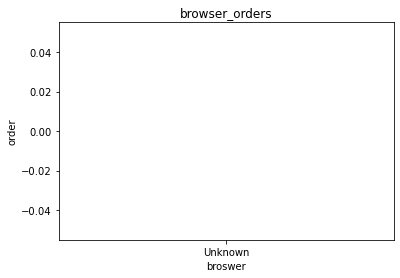

In [126]:
#tried to create a vusal graph to display au_browser and total orders placed but could not complete.
#What mistake was made 

import matplotlib.pyplot as plt



x = df['ua_browser']
y = df['total_orders_placed']

plt.plot(x,y)
plt.xlabel('broswer')
plt.ylabel('order')

plt.title('browser_orders')
Plt.show()

